In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set()
plt.style.use('./matplotlibrc')

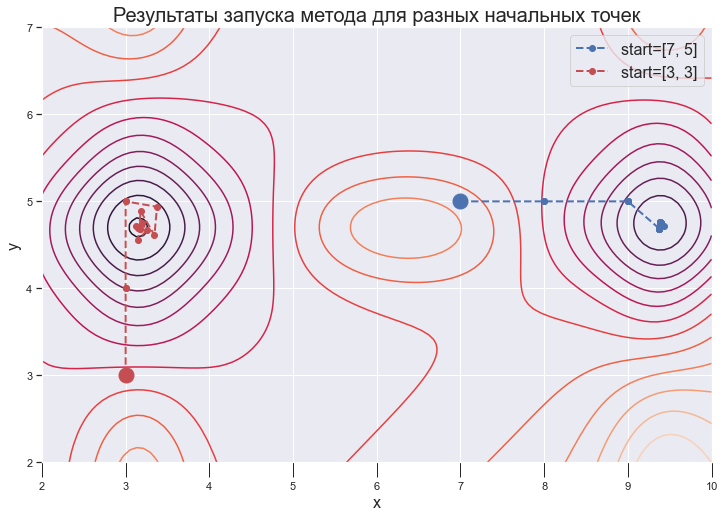

In [58]:
def f(x, y):
    return np.sin(y) * np.exp((1 - np.cos(x)) ** 2) + np.cos(x) * np.exp((1 - np.sin(y)) ** 2) + (x - y) ** 2


def make_initial_points(start):
    start = np.array(start)
    return [start] + list(start + np.eye(2))


def nelder_mead(f, predicate, initial_points, alpha=1, beta=0.5, gamma=2, delta=0.5,
                max_iters=1000, epsilon=1e-8):
    n = len(initial_points[0])
    history = [(initial_points[0], f(*initial_points[0]))]
    simplex = [(p, f(*p)) for p in initial_points]

    for _ in range(max_iters):
        simplex = sorted(simplex, key=lambda x: x[1])

        best = simplex[0]
        second_worst = simplex[-2]
        worst = simplex[-1]
        centroid = (sum(x[0] for x in simplex) - worst[0]) / n
        
        history.append(best)
        
        if np.linalg.norm(best[1] - worst[1]) < epsilon:
            break

        x_r = centroid + alpha * (centroid - worst[0])
        f_r = f(*x_r)

        # Reflect
        if best[1] <= f_r < second_worst[1] and predicate(*x_r):
            simplex[-1] = (x_r, f_r)
            continue

        # Expand - greedy
        if f_r < best[1] and predicate(*x_r):
            x_e = centroid + gamma * (x_r - centroid)
            f_e = f(*x_e)

            if f_e < f_r and predicate(*x_e):
                simplex[-1] = (x_e, f_e)
            else:
                simplex[-1] = (x_r, f_r)

            continue

        # Contract
        if f_r >= second_worst[1]:
            if second_worst[1] <= f_r < worst[1]:
                x_c = centroid + beta * (x_r - centroid)
                f_c = f(*x_c)

                if f_c <= f_r and predicate(*x_c):
                    simplex[-1] = (x_c, f_c)
                    continue

            if f_r >= worst[1]:
                x_c = centroid + beta * (worst[0] - centroid)
                f_c = f(*x_c)

                if f_c < worst[1] and predicate(*x_c):
                    simplex[-1] = (x_c, f_c)
                    continue

        # Shrink
        new_points = (best[0] + delta * (x[0] - best[0]) for x in simplex)
        simplex = list((x, f(*x)) for x in new_points)
    
    return history


predicate = lambda x, y: 0 <= x <= 11 and 0 <= y <= 11

start_1 = [7, 5]
start_2 = [3, 3]

history_1 = nelder_mead(f, predicate, make_initial_points(start_1))
history_2 = nelder_mead(f, predicate, make_initial_points(start_2))

points_1 = [x[0][0] for x in history_1], [x[0][1] for x in history_1]
points_2 = [x[0][0] for x in history_2], [x[0][1] for x in history_2]

x, y = np.meshgrid(np.linspace(2, 10, 100), np.linspace(2, 7, 100))

fig = plt.figure(figsize=(12, 8))

plt.plot(points_1[0], points_1[1], '--bo', linewidth=2, label=f'start={start_1}')
plt.plot(points_2[0], points_2[1], '--ro', linewidth=2, label=f'start={start_2}')
plt.plot(start_1[0], start_1[1], 'bo', markersize=15)
plt.plot(start_2[0], start_2[1], 'ro', markersize=15)

plt.contour(x, y, f(x, y), 20)

plt.legend()
plt.title('Результаты запуска метода для разных начальных точек')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

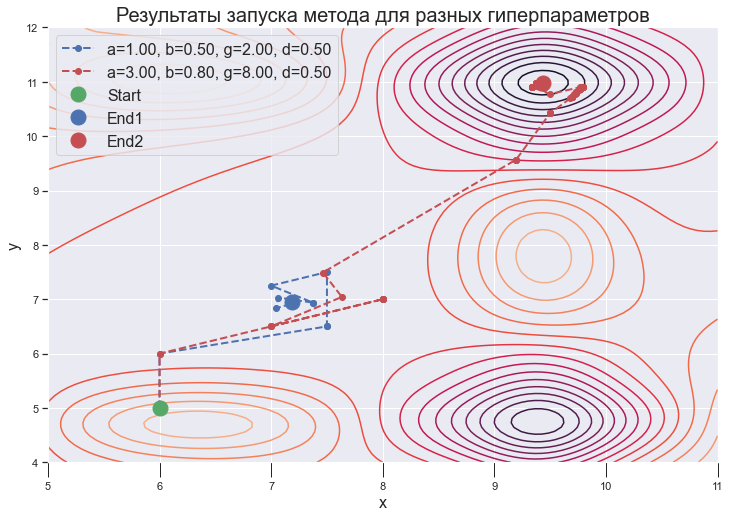

In [73]:
start = [6, 5]
a1 = 1
b1 = 0.5
g1 = 2
d1 = 0.5

a2 = 3
b2 = 0.8
g2 = 8
d2 = 0.5

history_1 = nelder_mead(f, predicate, make_initial_points(start), a1, b1, g1, d1)
history_2 = nelder_mead(f, predicate, make_initial_points(start), a2, b2, g2, d2)

points_1 = [x[0][0] for x in history_1], [x[0][1] for x in history_1]
points_2 = [x[0][0] for x in history_2], [x[0][1] for x in history_2]

x, y = np.meshgrid(np.linspace(5, 11, 100), np.linspace(4, 12, 100))

fig = plt.figure(figsize=(12, 8))

plt.plot(points_1[0], points_1[1], '--bo', linewidth=2, label=f'a={a1:.2f}, b={b1:.2f}, g={g1:.2f}, d={d1:.2f}')
plt.plot(points_2[0], points_2[1], '--ro', linewidth=2, label=f'a={a2:.2f}, b={b2:.2f}, g={g2:.2f}, d={d2:.2f}')
plt.plot(start[0], start[1], 'go', markersize=15, label='Start')
plt.plot(points_1[0][-1], points_1[1][-1], 'bo', markersize=15, label='End1')
plt.plot(points_2[0][-1], points_2[1][-1], 'ro', markersize=15, label='End2')

plt.contour(x, y, f(x, y), 20)

plt.legend()
plt.title('Результаты запуска метода для разных гиперпараметров')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [80]:
print('За сколько шагов сошелся метод.')
print()
print('При стандартных гиперпараметрах:', len(history_1))
print('При каких-то других гиперпараметрах:', len(history_2))
print()
print()

print('К чему сошелся метод.')
print()
print('При стандартных гиперпараметрах:', history_1[-1][1])
print('При каких-то других гиперпараметрах:', history_2[-1][1])

За сколько шагов сошелся метод.

При стандартных гиперпараметрах: 36
При каких-то других гиперпараметрах: 161


К чему сошелся метод.

При стандартных гиперпараметрах: 1.4870191280779839
При каких-то других гиперпараметрах: -106.76453670242144


Видим что для нашей задачи стандартные гиперпараметры дают результат хуже, но быстрее...